In [6]:
import numpy as np

from slam.basis import HamiltonianTemplate
from slam.hamiltonian import ConversionGainHamiltonian, SnailEffectiveHamiltonian, ConversionGainPhaseHamiltonian, FSimHamiltonian, CirculatorHamiltonian
from slam.cost_function import BasicCost
from slam.optimizer import TemplateOptimizer
from slam.sampler import GateSample
from slam.utils.gates.custom_gates import BerkeleyGate, RiSwapGate, ConversionGainGate
from slam.utils.visualize import optimizer_training_plot, unitary_to_weyl

In [11]:
%matplotlib widget

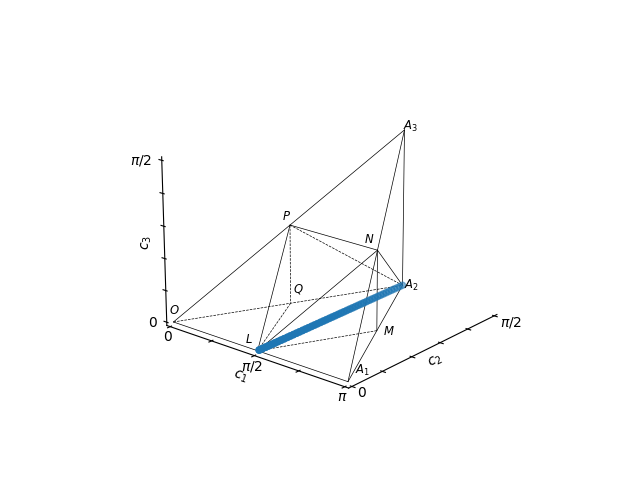

In [35]:
"""want to plot 2Q gates where cost =1"""
u_list = []
for i in np.linspace(0,1, 100):
        u = ConversionGainGate(0,0, i*np.pi/2, np.pi/2-i*np.pi/2, 1)
        if np.abs(1-u.cost()) < 1e-3:
            u_list.append(u)
unitary_to_weyl(*u_list);

# col = np.arange(len(coordinate_list))
# w.scatter(*zip(*coordinate_list), c=col, **kwargs)

# plt.close()
# fig = plt.figure()
# w = WeylChamber();
# axs= fig.add_subplot(111, projection="3d")
# for u in unitary:
#     w.add_point(*c1c2c3(np.array(u)))
# w.render(axs)

In [6]:
#h = SnailEffectiveHamiltonian()
from qiskit.circuit.library.standard_gates import SwapGate, iSwapGate
from slam.utils.gates.custom_gates import CParitySwap
# h = ConversionGainHamiltonian()
h = ConversionGainPhaseHamiltonian()
# h= FSimHamiltonian()
# h = ConversionGainHamiltonian()
# h = CirculatorHamiltonian()
basis = HamiltonianTemplate(h=h)
basis.n_qubits=2
objective = BasicCost()
optimizer = TemplateOptimizer(basis=basis, objective=objective, use_callback=False, training_restarts=10, override_fail=0)
#sampler = GateSample(BerkeleyGate().power(1/2))
sampler = GateSample(iSwapGate().power(1/2))
#sampler = GateSample(CParitySwap())
#sampler = GateSample(BerkeleyGate())
#sampler = GateSample(CParitySwap())
ret = optimizer.approximate_from_distribution(sampler=sampler)
#optimizer_training_plot(*ret);

ret = optimizer.approximate_target_U(sampler._get_unitary())
print(ret.loss_result)

print([el/np.pi for el in ret.Xk])

ValueError: cannot convert float NaN to integer

In [4]:
# #objective is to maximize E
# from scipy import optimize
# from slam.utils.monodromy.polytope_wrap import gate_set_to_haar_expectation
# def f(args):
#     u = h._construct_U_lambda(*args)(1).full()
#     return -1*gate_set_to_haar_expectation(u)
# ret = optimize.minimize(fun= f, x0=[np.pi/2, np.pi/2, 0,0])
# print(ret)

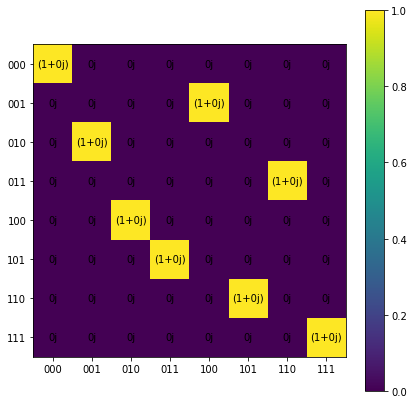

In [112]:
nn = 3 * np.sqrt(3) / 2
params = [np.pi / 2, -np.pi / 2, np.pi / 2, np.pi / nn, np.pi / nn, np.pi / nn]
u = CirculatorHamiltonian.construct_U(*params)
plotMatrix(u);

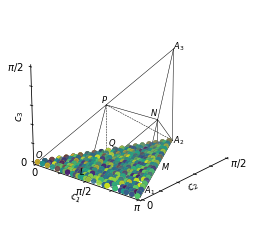

In [42]:
from weylchamber import c1c2c3
from slam.utils.visualize import plotMatrix
from slam.utils.visualize import unitary_to_weyl, weyl_training_plot
#plotMatrix(u).show();
c=.5
gc = c * np.pi/4
gg = np.pi/4 - gc
coord_list = []
# h = FSimHamiltonian()
h = ConversionGainHamiltonian()
for i in np.linspace(0, 2*np.pi, 40):
    for j in np.linspace(0, 2*np.pi, 40): #np.linspace(np.pi, 2*np.pi, 1):
        u = h._construct_U_lambda(i,j)(1).full()
        #unitary_to_weyl(u).show()
        coord_list.append(c1c2c3(u))

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4*1))
axs= fig.add_subplot(1,1,1, projection="3d")
weyl_training_plot(axs, coord_list)
#gate_set_to_haar_expectation(u)

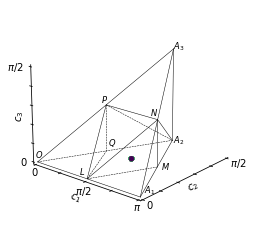

In [17]:
"""Testing what happens when we mess with the conversion gain phase terms
Appears that it makes no difference"""
from weylchamber import c1c2c3
import matplotlib.pyplot as plt
from slam.utils.visualize import weyl_training_plot
h = ConversionGainPhaseHamiltonian()
i = np.pi/8
j = 3*np.pi/8
coord_list = []
for pc in np.linspace(0, 2*np.pi, 10):
    for pg in np.linspace(0, 2*np.pi, 10):
        u = h.construct_U(i,j, pc, pg)
        coord_list.append(c1c2c3(u))
fig = plt.figure(figsize=(6,4*1))
axs= fig.add_subplot(1,1,1, projection="3d")
weyl_training_plot(axs, coord_list)

0.0


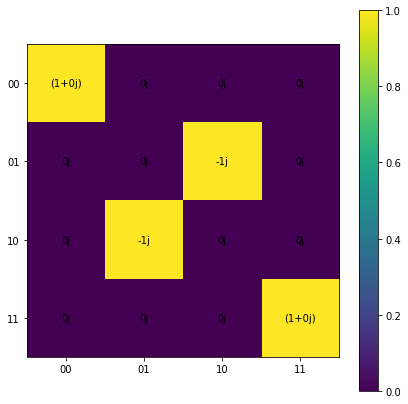

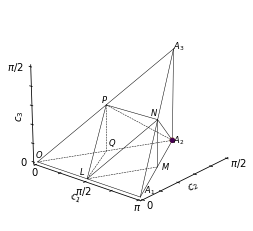

In [88]:
"""This was testing the difference between conversion only gates and gain only gates. They seem to be the same. Here we learned that they are the same but to make the gain gate exactly a conversion gate
you need to do X(0) before and X(0) after the gain gate, and then it matches the conversion gate"""

# from qiskit import QuantumCircuit


# h = ConversionGainHamiltonian()
# coord_list = []
# i=np.pi*.5
# j=0
# u1 = h._construct_U_lambda(i,j)(1).full()
# coord_list.append(c1c2c3(u1))
# u2 = h._construct_U_lambda(j,i)(1).full()
# coord_list.append(c1c2c3(u2))

# from qiskit.quantum_info import Operator
# qc = QuantumCircuit(2)
# qc.x(0)
# qc.append(Operator(u2), [0,1])
# qc.x(0)

# u2 = Operator(qc).data
# plotMatrix(u2)
# print(objective.unitary_fidelity(u1,u2))

# import matplotlib.pyplot as plt
# fig = plt.figure(figsize=(6,4*1))
# axs= fig.add_subplot(1,1,1, projection="3d")
# weyl_training_plot(axs, coord_list)

In [33]:
%matplotlib widget

In [7]:
from slam.utils.gates.custom_gates import FSim
coord_list = []
for i in np.linspace(0, 2*np.pi, 50):
    for j in np.linspace(0, 2*np.pi, 35):
        u = FSim(i,j).to_matrix()
        coord_list.append(c1c2c3(u))
fig = plt.figure(figsize=(6,4*1))
axs= fig.add_subplot(1,1,1, projection="3d")
weyl_training_plot(axs, coord_list)

NameError: name 'c1c2c3' is not defined

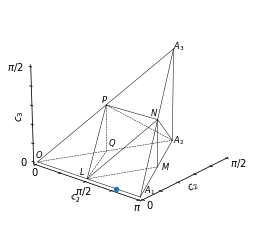

In [10]:
from slam.hamiltonian import FSimHamiltonian
h= FSimHamiltonian()
u = h._construct_U_lambda(np.pi, 9*np.pi/8)(1).full()
plotMatrix(u)
unitary_to_weyl(u).show()

2.2390977960640157e-12
[1.043137238416791, 0.34771262164041217, 1.1293808018306377]


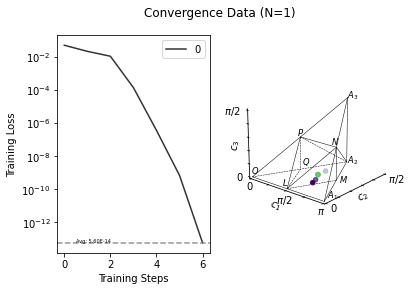

In [4]:
h = ConversionGainHamiltonian()
basis = HamiltonianTemplate(h=h)
objective = BasicCost()
optimizer = TemplateOptimizer(basis=basis, objective=objective, use_callback=True)
sampler = GateSample(BerkeleyGate())

ret = optimizer.approximate_from_distribution(sampler=sampler)
optimizer_training_plot(*ret);

ret = optimizer.approximate_target_U(sampler._get_unitary())
print(ret.loss_result)

from numpy import pi
print([el for el in ret.Xk])

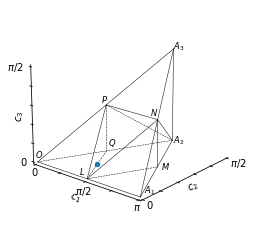

In [8]:
from slam.utils.gates.custom_gates import CustomCostGate
from slam.hamiltonian import ConversionGainHamiltonian
from slam.utils.monodromy.polytope_wrap import gate_set_to_haar_expectation
import numpy as np
from slam.utils.visualize import plotMatrix
h = ConversionGainHamiltonian()
gc, gg, t = [0.39536342562579196*np.pi, 0.1317854473495699*np.pi, 0.301915713619202*np.pi]
gc, gg, t = [2*np.pi/8, np.pi/8, 1]
u = h._construct_U_lambda(gc, gg)(t).full()
plotMatrix(u)
# u = CustomCostGate(u, f"B({i*np.pi/8, j*np.pi/8})", cost=1)
# gate_set_to_haar_expectation(u, chatty=True)
from slam.utils.visualize import unitary_to_weyl
unitary_to_weyl(u)

In [8]:
# from hamiltonian import Simul1QGatesHamiltonian
# h = Simul1QGatesHamiltonian()
# basis = HamiltonianTemplate(h=h)
# objective = BasicCost()
# optimizer = TemplateOptimizer(basis=basis, objective=objective, use_callback=True)
# sampler = GateSample(BerkeleyGate())
# ret = optimizer.approximate_from_distribution(sampler=sampler)
# optimizer_training_plot(*ret);
# ret = optimizer.approximate_target_U(sampler._get_unitary())
# print(ret.loss_result)
# from numpy import pi
# print([el/pi for el in ret.Xk])